# Heart Failure Prediction(Data transformation)

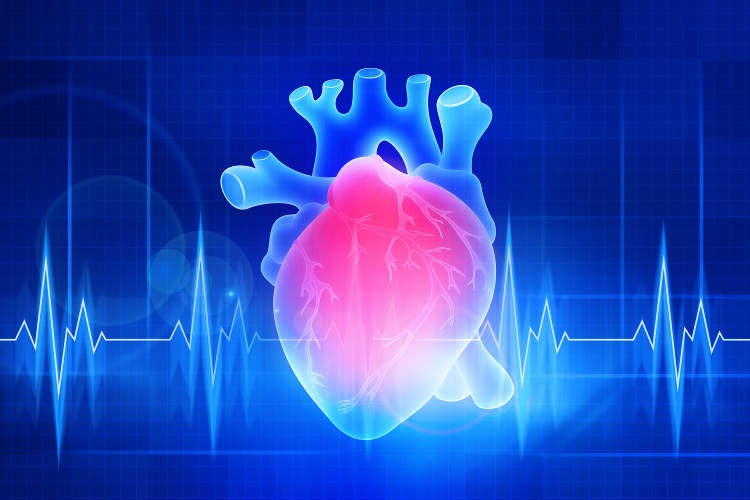

In [1]:
from IPython.display import Image
Image("heart_failure_750.jpeg")

## Introduction

Heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease, heart rhythm problems (arrhythmias) and heart defects you’re born with (congenital heart defects), among others.

The term “heart disease” is often used interchangeably with the term “cardiovascular disease”. Cardiovascular disease generally refers to conditions that involve narrowed or blocked blood vessels that can lead to a heart attack, chest pain (angina) or stroke. Other heart conditions, such as those that affect your heart’s muscle, valves or rhythm, also are considered forms of heart disease.

## Import libraries

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats
from collections import Counter
import pylab
from scipy.stats import norm, skew, boxcox
import warnings
warnings.filterwarnings("ignore")

In [47]:
df=pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Attribute Information:

Thirteen (13) clinical features:
- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- [target] death event: if the patient deceased during the follow-up period (boolean)

In [48]:
#The Columns
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [49]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [50]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

### Variable Description

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


__float64__ : age, platelets, serum_creatinine

__int64__ : We see that all our remaining columns are int.

In [52]:
def plot_hist(variable):
    print("min {} : {} ".format(variable, min(df[variable])))
    print("max {} : {}".format(variable, max(df[variable])))
        
    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1)
    plt.hist(df[variable], color="orange")
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist ".format(variable))
    plt.subplot(1,3,2)
    sns.distplot(df[variable], fit=norm)
    plt.title("{} distribution with Distplot ".format(variable))
    
    plt.subplot(1,3,3)
    stats.probplot(df[variable],dist='norm',plot=pylab)
    plt.title("{} distribution with Q-Q plot ".format(variable))
    plt.show()

min age : 40.0 
max age : 95.0


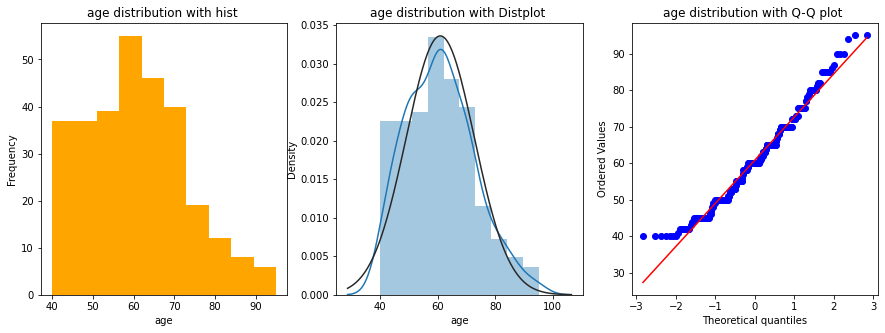

min creatinine_phosphokinase : 23 
max creatinine_phosphokinase : 7861


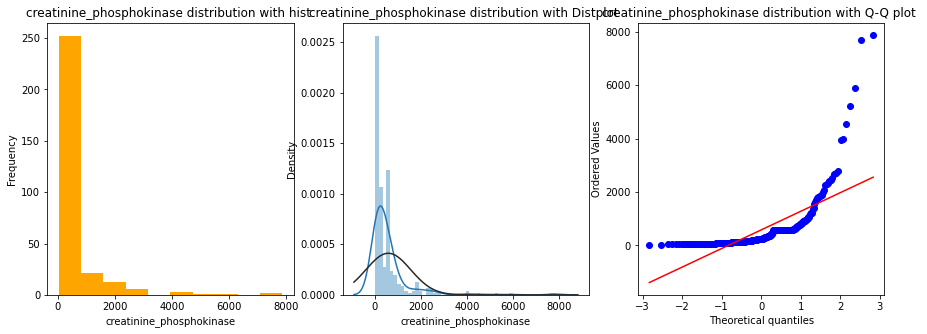

min ejection_fraction : 14 
max ejection_fraction : 80


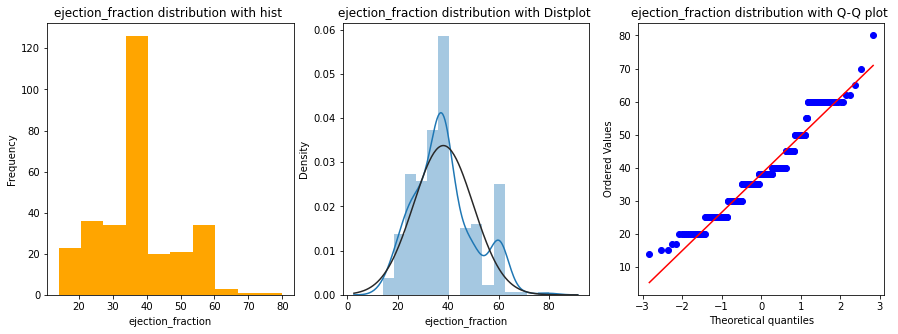

min platelets : 25100.0 
max platelets : 850000.0


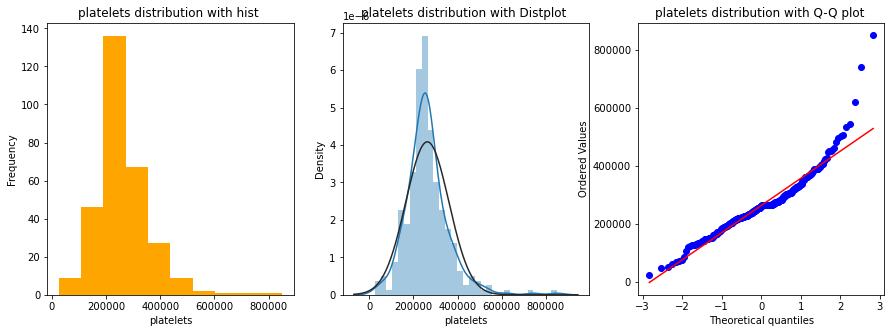

min serum_creatinine : 0.5 
max serum_creatinine : 9.4


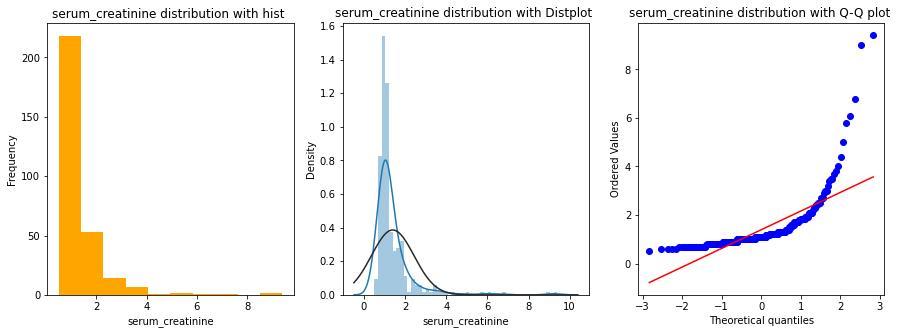

min serum_sodium : 113 
max serum_sodium : 148


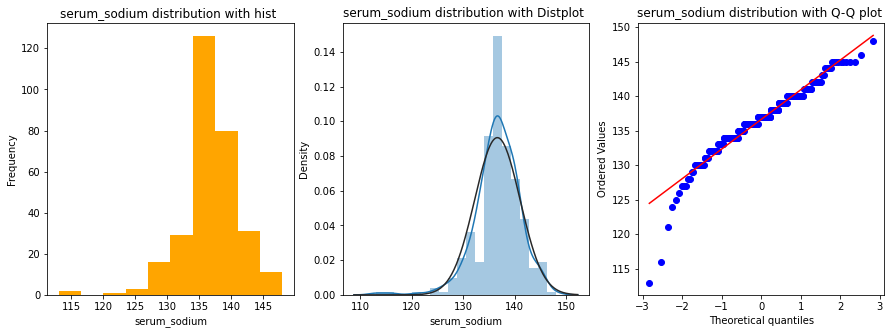

min time : 4 
max time : 285


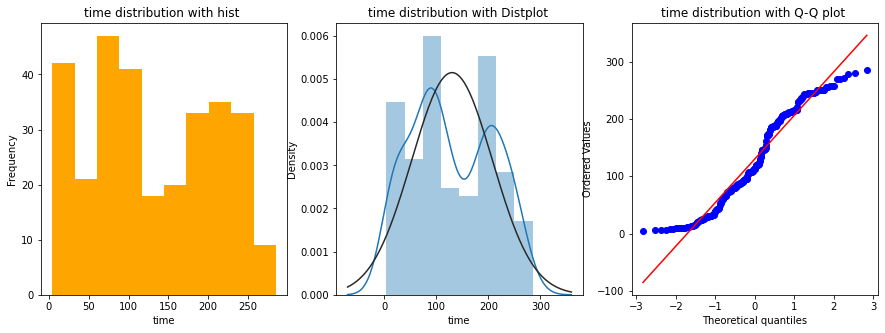

In [53]:
numericVar = ["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]
for n in numericVar:
    plot_hist(n)

In [54]:
def bar_plot(variable):
    
    # get feature
    var = df[variable]
    #count number of categorical variable (value/sample)
    varValue = var.value_counts()

    #visualize
    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue, linewidth = 2)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

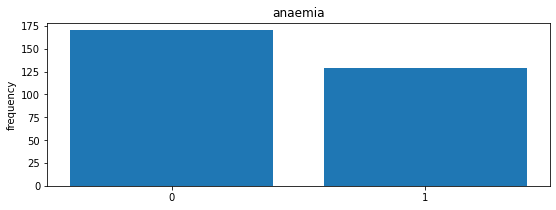

anaemia: 
 0    170
1    129
Name: anaemia, dtype: int64


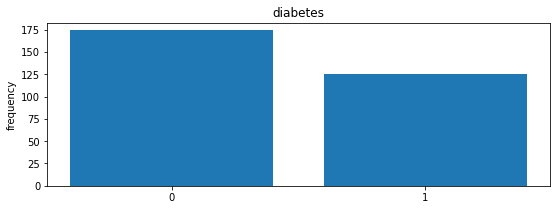

diabetes: 
 0    174
1    125
Name: diabetes, dtype: int64


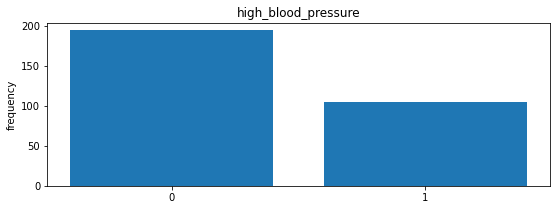

high_blood_pressure: 
 0    194
1    105
Name: high_blood_pressure, dtype: int64


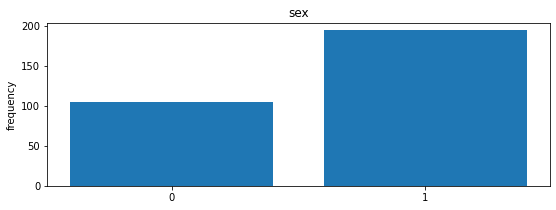

sex: 
 1    194
0    105
Name: sex, dtype: int64


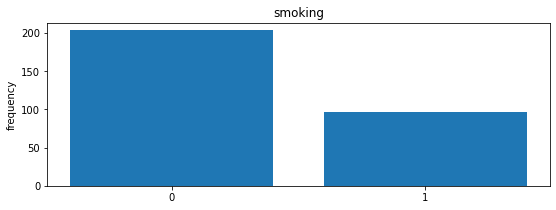

smoking: 
 0    203
1     96
Name: smoking, dtype: int64


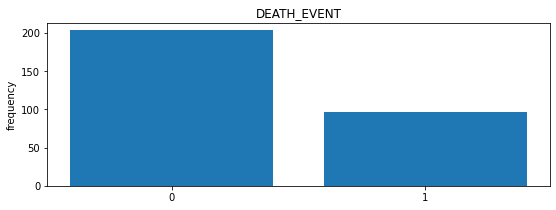

DEATH_EVENT: 
 0    203
1     96
Name: DEATH_EVENT, dtype: int64


In [55]:
category = ["anaemia","diabetes","high_blood_pressure","sex","smoking","DEATH_EVENT"]
for c in category:
    bar_plot(c)

## Outlier Detection

In [56]:
def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3st quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces 
        outlier_indices.extend(outlier_list_col)
        
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 1) 
    
    return multiple_outliers

In [57]:
df.loc[detect_outliers(df,["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"])]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
38,60.0,0,2656,1,30,0,305000.00,2.3,137,1,0,30,0
52,60.0,0,3964,1,62,0,263358.03,6.8,146,0,0,43,1
163,50.0,1,2334,1,35,0,75000.00,0.9,142,0,0,126,1
200,63.0,1,1767,0,45,0,73000.00,0.7,137,1,0,186,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
217,54.0,1,427,0,70,1,151000.00,9.0,137,0,0,196,1
117,85.0,1,102,0,60,0,507000.00,3.2,138,0,0,94,0
167,59.0,0,66,1,20,0,70000.00,2.4,134,1,0,135,1
281,70.0,0,582,0,40,0,51000.00,2.7,136,1,1,250,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Remove outliers

In [59]:
df = df.drop(detect_outliers(df,["age","creatinine_phosphokinase","ejection_fraction","platelets","serum_creatinine","serum_sodium","time"]),axis = 0).reset_index(drop=True)

##### reduce our outliers from our data.

## Feature Engineering

__Skewness__ : Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. In simple terms, it is how much a variable deviates from the normal distribution.

There are two types.

- Right Skewed or Positive Skewed
- Left Skewed or Negative Skewed

__Right Skewed or Positive Skewed__ --> The distribution has a rightward tail with respect to the normal distribution.

__Left Skewed or Negative Skewed__ --> The distribution has a tail to the left relative to the normal distribution.

Why is it important?
The model has difficulty in estimating the correct value at other points while focusing on the dense point while predicting on data that does not show a normal distribution.

What do we do, we will look at our skewness values. 
- If it is __greater than 1__, there is __positive skewness__, 
- if it is __less than -1__, there is __negative skewness__.

In [60]:
skewed_feats = df.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame(skewed_feats, columns = ["skewed"])
skewness

,skewed
creatinine_phosphokinase,4.827396
serum_creatinine,4.605615
platelets,1.429547
DEATH_EVENT,0.797132
smoking,0.729243
high_blood_pressure,0.583959
ejection_fraction,0.546146
age,0.413840
diabetes,0.358569
anaemia,0.286636


## positive skewned columns

In [135]:
skewness[skewness["skewed"]>1]

,skewed
creatinine_phosphokinase,4.827396
serum_creatinine,4.605615
platelets,1.429547


#### there is three positive skewned columns in data set

## Nagive  skewned columns

In [67]:
skewness[skewness["skewed"]<-1]

,skewed


#### there is no columns negtive skewned columns in data set

#### Guassian Transformation

Some machine learning algorithms like linear and logistic assume that the features are normally distributed -Accuracy -Performance

- logarithmic transformation
- reciprocal transformation
- square root transformation
- exponential transformation (more general, you can use any exponent)
- boxcox transformation

### create duplicte datset

In [71]:
data=df.copy(deep=True)

In [85]:
def plot_data(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    data[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(data[feature],dist='norm',plot=pylab)
    plt.show()

In [94]:
before_Trans=[]
Log_Trans=[]

## Logarithmic Transformation

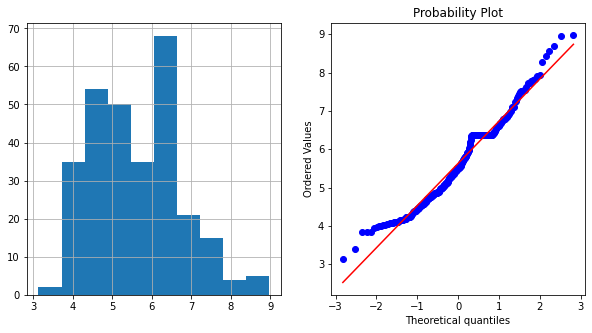

In [98]:
## creatinine_phosphokinase
import numpy as np
data['creatinine_phosphokinase_log']=np.log(data["creatinine_phosphokinase"])
plot_data(data,'creatinine_phosphokinase_log')

In [96]:
v1=data["creatinine_phosphokinase"].skew()
before_Trans.append(v1)

In [97]:
Log_Trans.append(data["creatinine_phosphokinase_log"].skew())

In [138]:
v1=data["serum_creatinine"].skew()
before_Trans.append(v1)

In [139]:
v1=data["platelets"].skew()
before_Trans.append(v1)

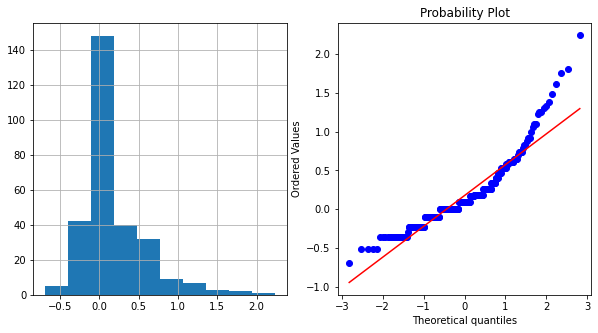

In [99]:
# serum_creatinine
data['serum_creatinine_log']=np.log(data["serum_creatinine"])
plot_data(data,'serum_creatinine_log')

In [100]:
Log_Trans.append(data["serum_creatinine_log"].skew())

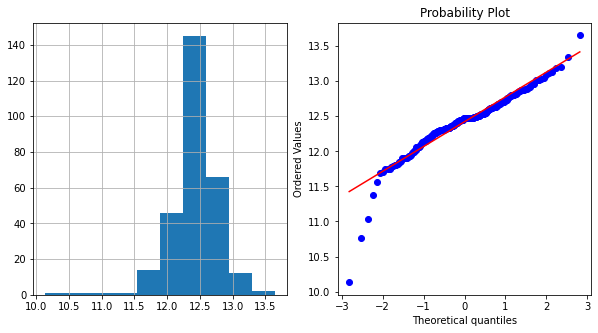

In [102]:
#platelets
data['platelets_log']=np.log(data["platelets"])
plot_data(data,'platelets_log')

In [103]:
Log_Trans.append(data["platelets_log"].skew())

##  Reciprocal Transformation

In [111]:
rec_tran=[]

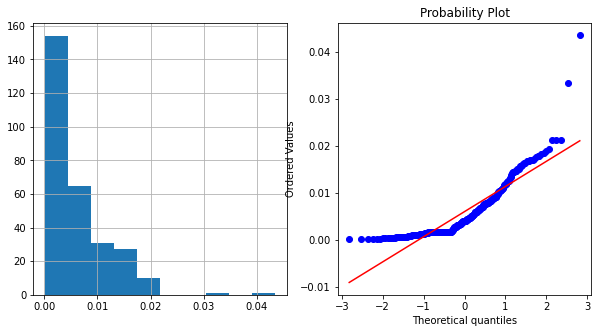

In [112]:
data['creatinine_phosphokinase_reciprocal']=1/(df["creatinine_phosphokinase"])
plot_data(data,'creatinine_phosphokinase_reciprocal')

In [113]:
rec_tran.append(data["creatinine_phosphokinase_reciprocal"].skew())

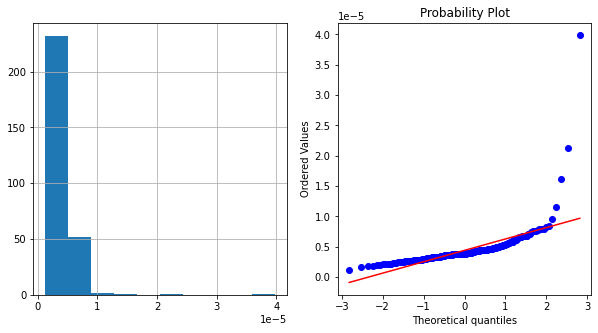

In [116]:
#platelets

data['platelets_reciprocal']=1/(df["platelets"])
plot_data(data,'platelets_reciprocal')

In [117]:
rec_tran.append(data["platelets_reciprocal"].skew())

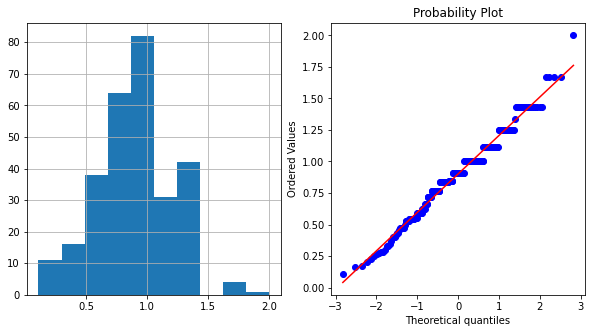

In [114]:
# serum_creatinine
data['serum_creatinine_reciprocal']=1/(df["serum_creatinine"])
plot_data(data,'serum_creatinine_reciprocal')

In [115]:
rec_tran.append(data["serum_creatinine_reciprocal"].skew())

## Square Root Transformation

In [118]:
sqrt_tran=[]

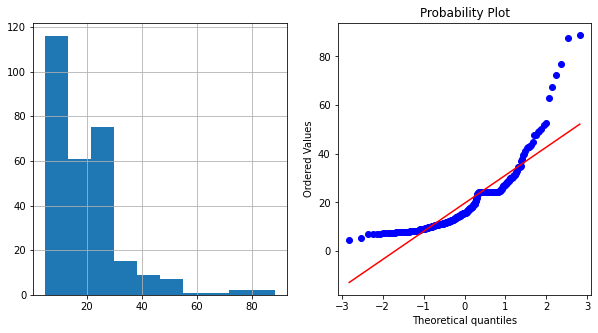

In [119]:
## creatinine_phosphokinase
data['creatinine_phosphokinase_sqaure']=data["creatinine_phosphokinase"]**(1/2)
plot_data(data,'creatinine_phosphokinase_sqaure')

In [120]:
sqrt_tran.append(data["creatinine_phosphokinase_sqaure"].skew())

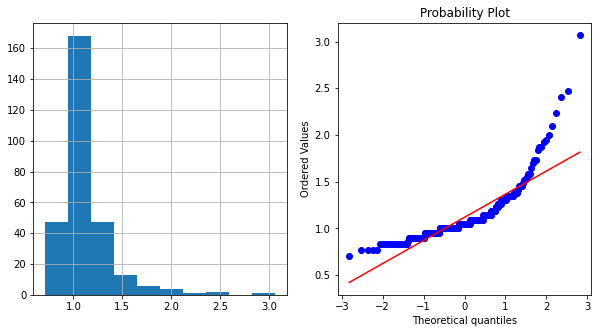

In [121]:
# serum_creatinine
data['serum_creatinine_sqaure']=data["serum_creatinine"]**(1/2)
plot_data(data,'serum_creatinine_sqaure')
sqrt_tran.append(data["serum_creatinine_sqaure"].skew())

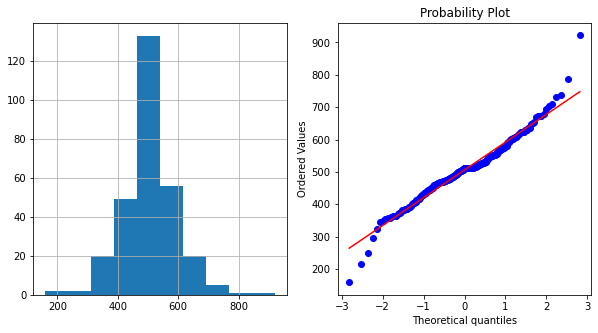

In [122]:
#platelets
data['platelets_sqaure']=data["platelets"]**(1/2)
plot_data(data,'platelets_sqaure')
sqrt_tran.append(data["platelets_sqaure"].skew())

#### Exponential Transdormation

In [123]:
exp_tran=[]

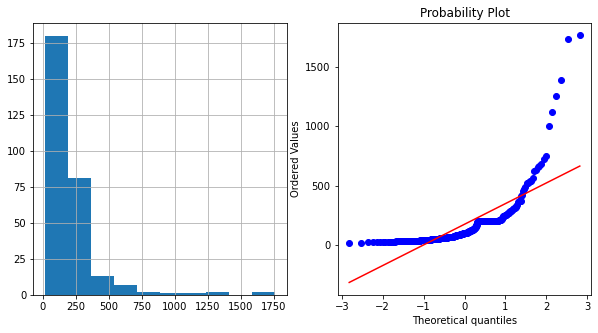

In [124]:
## creatinine_phosphokinase
data['creatinine_phosphokinase_exponential']=data["creatinine_phosphokinase"]**(1/1.2)
plot_data(data,'creatinine_phosphokinase_exponential')
exp_tran.append(data["creatinine_phosphokinase_exponential"].skew())

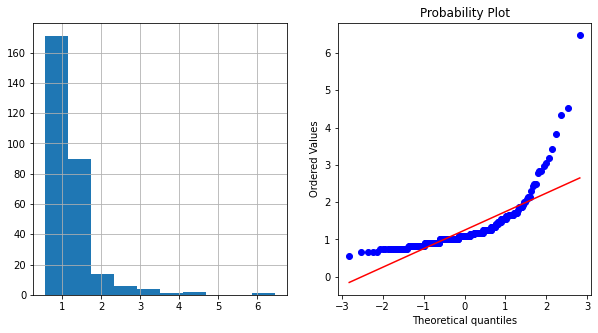

In [125]:
# serum_creatinine
data['serum_creatinine_exponential']=data["serum_creatinine"]**(1/1.2)
plot_data(data,'serum_creatinine_exponential')
exp_tran.append(data["serum_creatinine_exponential"].skew())

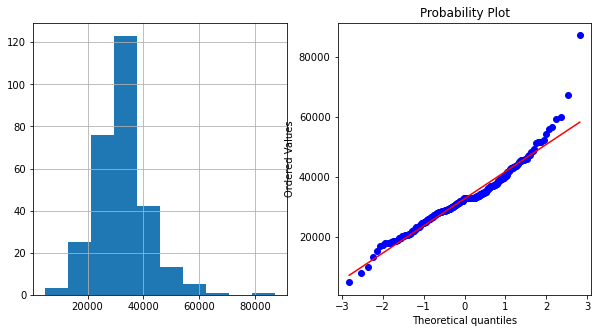

In [126]:
#platelets
data['platelets_exponential']=data["platelets"]**(1/1.2)
plot_data(data,'platelets_exponential')
exp_tran.append(data["platelets_exponential"].skew())

### BoxCOx Transformation
The Box-Cox transformation is defined as:

T(Y)=(Y exp(λ)−1)/λ

where Y is the response variable and λ is the transformation parameter. λ varies from -5 to 5. In the transformation, all values of λ are considered and the optimal value for a given variable is selected

In [127]:
boxcox_tran=[]

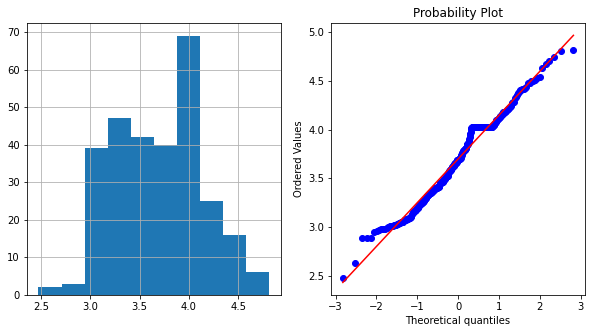

In [128]:
## creatinine_phosphokinase
data['creatinine_phosphokinase_Boxcox'],parameters=stats.boxcox(data["creatinine_phosphokinase"])
plot_data(data,'creatinine_phosphokinase_Boxcox')
boxcox_tran.append(data["creatinine_phosphokinase_Boxcox"].skew())

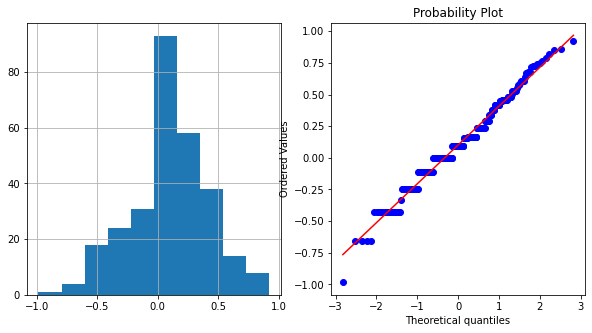

In [130]:
## serum_creatinine
data['serum_creatinine_Boxcox'],parameters=stats.boxcox(data["serum_creatinine"])
plot_data(data,'serum_creatinine_Boxcox')
boxcox_tran.append(data["serum_creatinine_Boxcox"].skew())

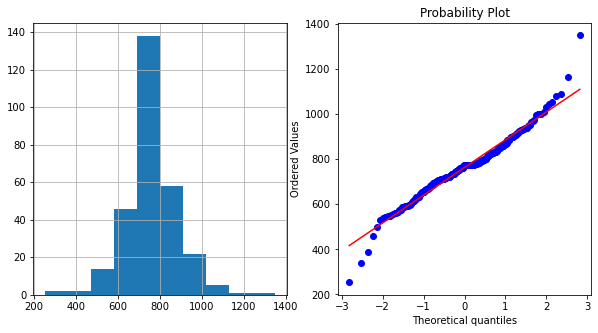

In [131]:
## platelets
data['platelets_Boxcox'],parameters=stats.boxcox(data["platelets"])
plot_data(data,'platelets_Boxcox')
boxcox_tran.append(data["platelets_Boxcox"].skew())

In [143]:
name = ['creatinine_phosphokinase', 'serum_creatinine', 'platelets']
results=pd.DataFrame({"name":name,'before_trans': before_Trans,
                      'Logarithmic transformation': Log_Trans,
                      'reciprocal transformatio': rec_tran,
                      "square root transformation":sqrt_tran,
                      "exponential transformation":exp_tran,
                      "boxcox transformation":boxcox_tran
                      })
display(results)

,name,before_trans,Logarithmic transformation,reciprocal transformatio,square root transformation,exponential transformation,boxcox transformation
0,creatinine_phosphokinase,4.852619,0.416232,1.911456,2.259576,3.989182,0.038532
1,serum_creatinine,4.629680,1.509754,0.054315,2.767201,3.933487,-0.005123
2,platelets,1.437016,-1.286414,8.258705,0.221134,1.026424,0.153955


## From bove table we will conclued  the BOxCOx transformtion give best values

In [146]:
def boxcox(df,feature):
    df[str(feature)+"_Boxcox"],parameters=stats.boxcox(df[feature])
    plot_data(df,str(feature)+"_Boxcox")
   

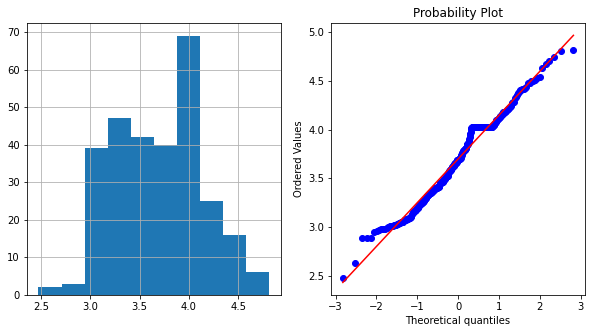

In [147]:
boxcox(df,"creatinine_phosphokinase")

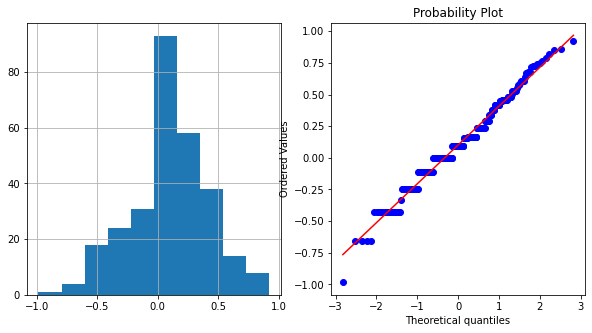

In [148]:
boxcox(df,"serum_creatinine")

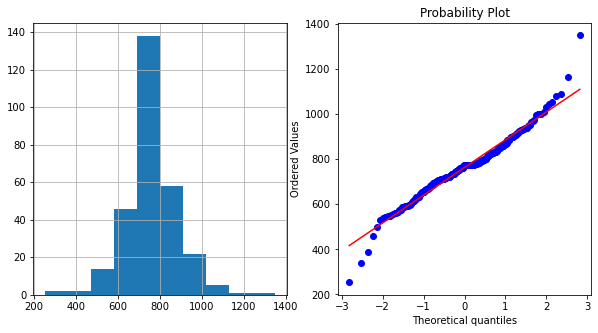

In [149]:
boxcox(df,"platelets")

In [151]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,creatinine_phosphokinase_Boxcox,serum_creatinine_Boxcox,platelets_Boxcox
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,4.025638,0.478943,776.442477
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,4.812379,0.091073,774.155955
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,3.457055,0.231885,614.694301
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,3.328958,0.478943,695.287977
4,90.0,1,47,0,40,1,204000.00,2.1,132,1,1,8,1,2.889637,0.530416,685.786862


In [153]:
X = data.drop(["DEATH_EVENT","creatinine_phosphokinase","serum_creatinine","platelets"], axis = 1)
y = data.DEATH_EVENT

In [154]:
X.head()

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,serum_sodium,sex,smoking,time,creatinine_phosphokinase_log,...,serum_creatinine_reciprocal,creatinine_phosphokinase_sqaure,serum_creatinine_sqaure,platelets_sqaure,creatinine_phosphokinase_exponential,serum_creatinine_exponential,platelets_exponential,creatinine_phosphokinase_Boxcox,serum_creatinine_Boxcox,platelets_Boxcox
0,75.0,0,0,20,1,130,1,0,4,6.366470,...,0.526316,24.124676,1.378405,514.781507,201.419952,1.707240,33065.231038,4.025638,0.478943,776.442477
1,55.0,0,0,38,0,136,1,0,6,8.969669,...,0.909091,88.662281,1.048809,513.184207,1762.915503,1.082665,32894.412741,4.812379,0.091073,774.155955
2,65.0,0,0,20,0,129,1,1,7,4.983607,...,0.769231,12.083046,1.140175,402.492236,63.624939,1.244379,21941.307912,3.457055,0.231885,614.694301
3,50.0,1,0,20,0,137,1,0,7,4.709530,...,0.526316,10.535654,1.378405,458.257569,50.633251,1.707240,27238.472273,3.328958,0.478943,695.287977
4,90.0,1,0,40,1,132,1,1,8,3.850148,...,0.476190,6.855655,1.449138,451.663592,24.740865,1.855736,26588.375661,2.889637,0.530416,685.786862


### Splitting the Data into Training and Testing Sets

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [160]:
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, plot_confusion_matrix, auc
result_acc = []

## Logistic Regression Model

In [164]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
cm_log_reg = confusion_matrix(y_pred_log, y_test)
acc_log_reg = accuracy_score(y_test, y_pred_log)
result_acc.append(acc_log_reg)
print("RESULT")
print("Logistic Regression Model Acc : ",acc_log_reg)
print("Logistic Regression Model Cm : ",cm_log_reg)

RESULT
Logistic Regression Model Acc :  0.821917808219178
Logistic Regression Model Cm :  [[43  8]
 [ 5 17]]


In [165]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
cm_svm = confusion_matrix(y_pred_svm, y_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
result_acc.append(acc_svm)
print("RESULT")
print("SVM Model Acc : ",acc_svm)
print("SVM Model Cm : ",cm_svm)

RESULT
SVM Model Acc :  0.6575342465753424
SVM Model Cm :  [[48 25]
 [ 0  0]]


In [166]:
from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(max_depth=7, random_state=25)
random_forest_model.fit(X_train, y_train)
y_pred_random_forest = random_forest_model.predict(X_test)
cm_random_forest = confusion_matrix(y_pred_random_forest, y_test)
acc_random_forest = accuracy_score(y_test, y_pred_random_forest)
result_acc.append(acc_random_forest)
print("RESULT")
print("Random Forest Model Acc : ",acc_random_forest)
print("Random Forest Model Cm : ",cm_random_forest)

RESULT
Random Forest Model Acc :  0.8493150684931506
Random Forest Model Cm :  [[46  9]
 [ 2 16]]


In [168]:
results = pd.DataFrame({"Model Result":result_acc, 
                        "Models":["LogisticRegression",
                                  "SVM","RandomForest"]})

In [170]:
results

,Model Result,Models
0,0.821918,LogisticRegression
1,0.657534,SVM
2,0.849315,RandomForest


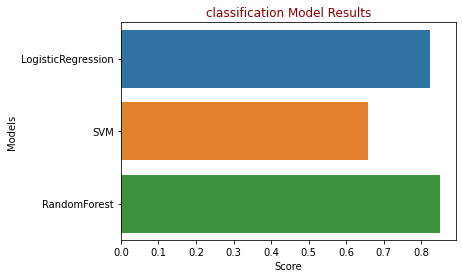

In [171]:
g = sns.barplot(y = results.Models, x =results["Model Result"])
g.set_xlabel("Score")
g.set_title("classification Model Results", color = "darkred")
plt.show()

## From above 3 models given good results the best among them  RandomForest classifier.